In [1]:
% load_ext autoreload
% autoreload 2

# Create database

In [2]:
import os
import datajoint as dj

In [3]:
username = !whoami
username = username[0]
username

'joesterle'

In [4]:
home_directory = os.path.expanduser("~")
home_directory

'/gpfs01/berens/user/joesterle'

In [5]:
# Set config file
config_file = f'{home_directory}/datajoint/dj_{username}_conf.json'
assert os.path.isfile(config_file), f'Set the path to your config file: {config_file}'

In [7]:
# Define a schema name or use the default name for your personal test schema
schema_name = f"ageuler_{username}_test"

In [8]:
output_folder = f'{home_directory}/datajoint/rgc_classifier'
assert os.path.isdir(output_folder), f'Set path to output directory: {output_folder}'

In [9]:
from djimaging.tables.optional.rgc_classifier import prepare_dj_config_rgc_classifier

# Load configuration for user
dj.config.load(config_file)
dj.config['schema_name'] = schema_name

prepare_dj_config_rgc_classifier(output_folder)

print("schema_name:", dj.config['schema_name'])
dj.conn()

schema_name: ageuler_joesterle_test
Connecting joesterle@172.25.240.205:3306


DataJoint connection (connected) joesterle@172.25.240.205:3306

In [11]:
from djimaging.schemas.rgc_classifier_schema import *

In [12]:
from djimaging.utils.dj_utils import activate_schema

activate_schema(schema=schema, create_schema=True, create_tables=True)
schema

Schema `ageuler_joesterle_test`

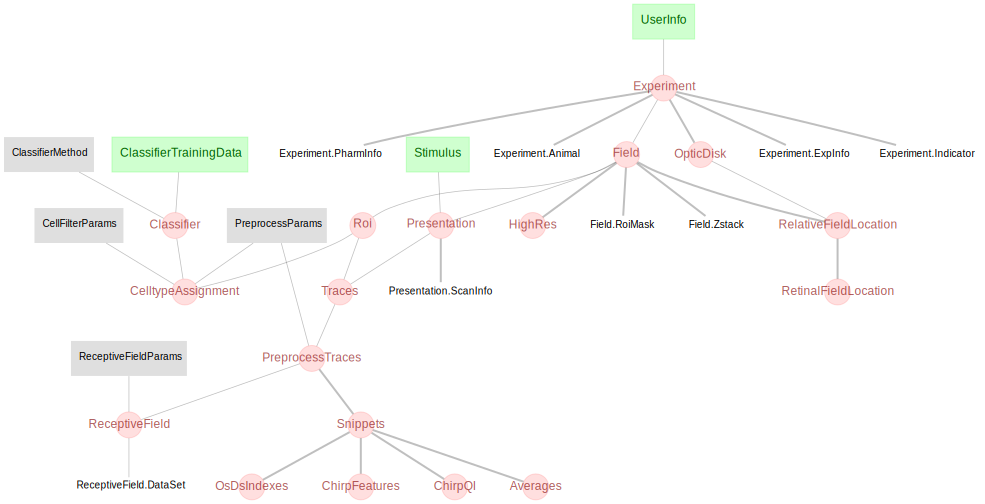

In [14]:
# Draw the ERD of your schema, this may take a while
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

dj.ERD(schema)

# Add classifier method

In [ ]:
classifier_fn = "sklearn.ensemble.RandomForestClassifier"
classifier_config = {
    'class_weight': 'balanced',
    'random_state': 2001,
    'oob_score': True,
    'ccp_alpha': 0.00021870687842726034,
    'max_depth': 50,
    'max_leaf_nodes': None,
    'min_impurity_decrease': 0,
    'n_estimators': 1000,
    'n_jobs': 20,
}

ClassifierMethod().add_classifier(
    classifier_config=classifier_config,
    classifier_fn=classifier_fn, comment="test", skip_duplicates=True)

In [ ]:
ClassifierMethod()

# Add training data

In [ ]:
ipath = dj.config['stores']["classifier_input"]["location"] + '/'
opath = dj.config['stores']["classifier_output"]["location"] + '/'

ClassifierTrainingData().add_trainingdata(
    project="False",
    output_path=opath,
    chirp_feats_file=ipath + 'chirp_feats.npz',
    bar_feats_file=ipath + 'bar_feats.npz',
    baden_data_file=ipath + 'RGCData_postprocessed.mat',
    training_data_file=ipath + 'training_all.pkl',
    skip_duplicates=True,
)
ClassifierTrainingData()

# Make sure data is loaded to the DataBase

In [ ]:
userinfo = {
    'experimenter': 'DataJointTestData',  # Replace this if you want to use your own data
    'data_dir': '/gpfs01/euler/data/Data/DataJointTestData/',  # Replace this if you want to use your own data
    'datatype_loc': 0,
    'animal_loc': 1,
    'region_loc': 2,
    'field_loc': 3,
    'stimulus_loc': 4,
    'condition_loc': 5,
}

assert os.path.isdir(userinfo['data_dir'])

In [ ]:
UserInfo().upload_user(userinfo)
UserInfo()

In [ ]:
Experiment().rescan_filesystem(verboselvl=0)
Experiment()

In [ ]:
Field().rescan_filesystem(verboselvl=0)
Field()

In [ ]:
Roi().populate()
Roi()

In [ ]:
Field().populate()

In [ ]:
Stimulus().add_nostim(skip_duplicates=True)
Stimulus().add_chirp(spatialextent=1000, stim_name='gChirp', alias="chirp_gchirp_globalchirp", skip_duplicates=True)
Stimulus().add_chirp(spatialextent=300, stim_name='lChirp', alias="lchirp_localchirp", skip_duplicates=True)
Stimulus().add_noise(stim_name='noise', pix_n_x=20, pix_n_y=15, pix_scale_x_um=30, pix_scale_y_um=30,
                     skip_duplicates=True)
Stimulus().add_movingbar(skip_duplicates=True)

In [ ]:
Presentation().populate()
Presentation()

In [ ]:
Traces().populate()
Traces()

In [ ]:
PreprocessParams().add_default(skip_duplicates=True)
PreprocessParams()

In [ ]:
PreprocessTraces().populate(display_progress=True)
PreprocessTraces()

In [ ]:
Snippets().populate(display_progress=True)
Snippets()

In [ ]:
ChirpQI.populate()
ChirpQI()

In [ ]:
OsDsIndexes.populate()
OsDsIndexes()

# Add ClassifierSeed and CellFilterParameters

In [ ]:
CellFilterParams().add_parameters(qi_thres_chirp=0.35, qi_thres_bar=0.6, cell_selection_constraint="or",
                                  skip_duplicates=True)
CellFilterParams()

# Train classifier

In [ ]:
Classifier().populate()
Classifier()

In [ ]:
Classifier().fetch1("classifier_file")

# Assign cell types

-1 Mean no assignment because of the quality

The cell type assignment can still be uncertain, though. You should filter by confidence!

In [ ]:
CelltypeAssignment().populate()

In [ ]:
CelltypeAssignment()

In [ ]:
CelltypeAssignment().plot()